<a href="https://colab.research.google.com/github/rizqyjoe/Facial_Expression_Recognition_CNN_VGG16/blob/main/Coba3/Model%204_Scratch/001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from keras import layers
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model

from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:400: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [2]:
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
 
dataset_path = '/content/drive/MyDrive/Dataset/fer2013 dataset/fer2013/fer2013.csv'
image_size=(48,48)

def load_fer2013():
    data = pd.read_csv(dataset_path)
    data = (data[data['pixels'].notnull()])
    pixels = data['pixels'].tolist()
    width, height = 48, 48
    faces = []
    for pixel_sequence in pixels:
        face = [int(pixel) for pixel in pixel_sequence.split(' ')]
        face = np.asarray(face).reshape(width, height)
        face = cv2.resize(face.astype('uint8'),image_size)
        faces.append(face.astype('float32'))
    faces = np.asarray(faces)
    faces = np.expand_dims(faces, -1)
    emotions = (data['emotion'])#.values
    return faces, emotions
 
def preprocess_input(x, v2=True):
    x = x.astype('float32')
    x = x / 255.0
    if v2:
        x = x - 0.5
        x = x * 2.0
    return x
 
faces, emotions = load_fer2013()
faces = preprocess_input(faces)
#xtrain, xtest,ytrain,ytest = train_test_split(faces, emotions,test_size=0.2,shuffle=True)
#Data Augumentation
'''data_generator = ImageDataGenerator(rotation_range=10,
                                    shear_range = 10,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=.1,
                                    horizontal_flip=True)'''

data_generator = ImageDataGenerator()

In [3]:
train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely # the _junk suffix means that we drop that variable completely
#x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size=1 - train_ratio)

xtrain, xtest, ytrain, ytest = train_test_split(faces, emotions, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
#x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 
x_val, xtest, y_val, ytest = train_test_split(xtest, ytest, test_size=test_ratio/(test_ratio + validation_ratio)) 

In [4]:
print ("validasi",x_val.shape)
print (y_val.shape)
print ("test",xtest.shape)
print (ytest.shape)
print ("train",xtrain.shape)
print (ytrain.shape)

validasi (3589, 48, 48, 1)
(3589,)
test (3589, 48, 48, 1)
(3589,)
train (28709, 48, 48, 1)
(28709,)


Model

In [5]:
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization, Activation

input_shape = (48, 48, 1)
num_classes = 7

model = Sequential()

model.add(Conv2D(filters=64,input_shape=(input_shape),kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=num_classes, activation='softmax'))

In [ ]:
'''model.add(Conv2D(filters=64,input_shape=(input_shape),kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())

model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=num_class, activation="softmax"))

model.add(Dropout(0.5))
model.add(BatchNormalization())

In [ ]:
'''model = Sequential()

model.add(VGG16(
    include_top = False,
    pooling='avg',
    weights='imagenet',
))

In [ ]:
'''model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dense(num_classes, activation='softmax', name = 'classifer'))'''

In [ ]:
'''model.layers[0].layers

In [ ]:
'''model.layers[0].trainable = False

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [7]:
from keras.optimizers import Adam,RMSprop,SGD

In [8]:
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
batch_size = 64
num_epochs = 100

history = model.fit(data_generator.flow(xtrain, ytrain),
                    steps_per_epoch=len(xtrain) / batch_size,
                    epochs=num_epochs, 
                    verbose=1,
                    validation_data= (x_val,y_val))

Epoch 1/100
448/448 [==============================] - 34s 35ms/step - loss: 2.2334 - accuracy: 0.1765 - val_loss: 1.8747 - val_accuracy: 0.2502
Epoch 2/100
448/448 [==============================] - 14s 31ms/step - loss: 1.8732 - accuracy: 0.2162 - val_loss: 1.8458 - val_accuracy: 0.2502
Epoch 3/100
448/448 [==============================] - 14s 31ms/step - loss: 1.8411 - accuracy: 0.2221 - val_loss: 1.8432 - val_accuracy: 0.2502
Epoch 4/100
448/448 [==============================] - 14s 32ms/step - loss: 1.8374 - accuracy: 0.2313 - val_loss: 1.8433 - val_accuracy: 0.2502
Epoch 5/100
448/448 [==============================] - 14s 32ms/step - loss: 1.8295 - accuracy: 0.2286 - val_loss: 1.8422 - val_accuracy: 0.2502
Epoch 6/100
448/448 [==============================] - 14s 32ms/step - loss: 1.8301 - accuracy: 0.2316 - val_loss: 1.8478 - val_accuracy: 0.2502
Epoch 7/100
448/448 [==============================] - 14s 32ms/step - loss: 1.8086 - accuracy: 0.2359 - val_loss: 1.8541 - val_ac

In [13]:
model.save('/content/drive/MyDrive/Colab Notebooks/Model/Model4_Fix_VGG16.h5')

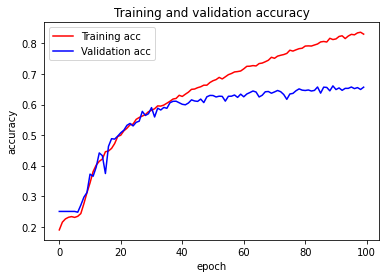

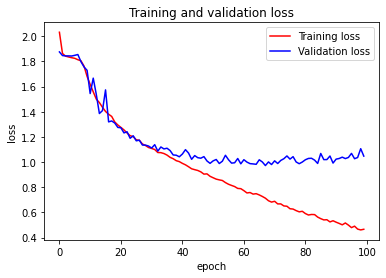

In [10]:
import matplotlib.pyplot as plt 

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
num_epochs = range(len(accuracy))
plt.plot(num_epochs, accuracy, 'r', label='Training acc')
plt.plot(num_epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(num_epochs, loss, 'r', label='Training loss')
plt.plot(num_epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

In [11]:
testloss = model.evaluate(xtest, ytest) 
print("Test Loss " + str(testloss[0]))
print("Test Acc: " + str(testloss[1]))

trainloss = model.evaluate(xtrain, ytrain) 
print("Train Loss " + str(trainloss[0]))
print("Train Acc: " + str(trainloss[1]))

113/113 [==============================] - 1s 9ms/step - loss: 1.1066 - accuracy: 0.6461
Test Loss 1.1066163778305054
Test Acc: 0.646140992641449
898/898 [==============================] - 8s 9ms/step - loss: 0.2768 - accuracy: 0.9269
Train Loss 0.2768288254737854
Train Acc: 0.9269218444824219


In [12]:
testlosz = model.evaluate(x_val, y_val) 
print("val Loss " + str(testlosz[0]))
print("val Acc: " + str(testlosz[1]))

113/113 [==============================] - 1s 9ms/step - loss: 1.0473 - accuracy: 0.6567
val Loss 1.0473237037658691
val Acc: 0.6567289233207703


In [14]:
from keras.models import load_model
model_load = load_model('/content/drive/MyDrive/Colab Notebooks/Model/Model1_Fix_VGG16.h5')

model_load.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0

In [15]:
testloss = model_load.evaluate(xtest, ytest) 
print("Test Loss " + str(testloss[0]))
print("Test Acc: " + str(testloss[1]))

testloss = model_load.evaluate(xtrain, ytrain) 
print("Test Loss " + str(testloss[0]))
print("Test Acc: " + str(testloss[1]))

113/113 [==============================] - 2s 13ms/step - loss: 1.0577 - accuracy: 0.6032
Test Loss 1.057716965675354
Test Acc: 0.6032320857048035
898/898 [==============================] - 11s 12ms/step - loss: 1.0435 - accuracy: 0.6069
Test Loss 1.0435068607330322
Test Acc: 0.6068828701972961


In [16]:
testlosz = model_load.evaluate(x_val, y_val) 
print("Test Loss " + str(testlosz[0]))
print("Test Acc: " + str(testlosz[1]))

113/113 [==============================] - 1s 12ms/step - loss: 1.0465 - accuracy: 0.5979
Test Loss 1.046452522277832
Test Acc: 0.5979381203651428


In [17]:
print (x_val.shape)
print (y_val.shape)
print (xtest.shape)
print (ytest.shape)
print (xtrain.shape)
print (ytrain.shape)

(3589, 48, 48, 1)
(3589,)
(3589, 48, 48, 1)
(3589,)
(28709, 48, 48, 1)
(28709,)


In [18]:
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix

#y_pred = model_load.predict(xtest)

test_prob = model_load.predict(xtest)
test_pred = np.argmax(test_prob, axis=1)
test_accuracy = np.mean(test_pred == ytest)

print(test_accuracy)

0.6032320980774589


In [19]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

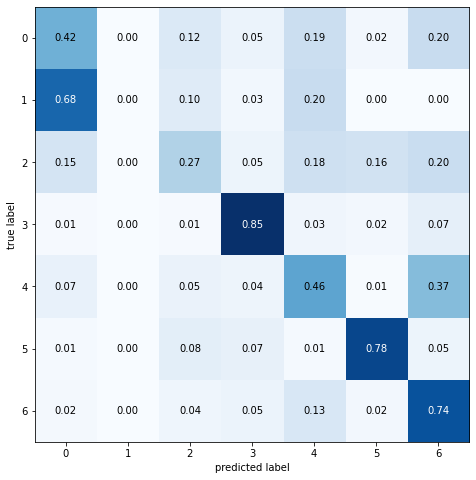

In [20]:
conf_mat = confusion_matrix(ytest, test_pred)

pd.DataFrame(conf_mat, columns=emotions.values(), index=emotions.values())



fig, ax = plot_confusion_matrix(conf_mat=conf_mat,show_normed=True,show_absolute=False,figsize=(8, 8))
fig.show()

In [21]:
print(classification_report(ytest, test_pred, target_names=emotions.values()))

              precision    recall  f1-score   support

       Angry       0.58      0.42      0.49       529
     Disgust       0.00      0.00      0.00        40
        Fear       0.45      0.27      0.33       497
       Happy       0.85      0.85      0.85       883
         Sad       0.48      0.46      0.47       621
    Surprise       0.70      0.78      0.74       396
     Neutral       0.47      0.74      0.58       623

    accuracy                           0.60      3589
   macro avg       0.50      0.50      0.49      3589
weighted avg       0.60      0.60      0.59      3589



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
